## Ian Arzt, Nai Wang, and Emmanuella Eguche

In [39]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Setup

In [40]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

Q1.

In [41]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']
print(df['RESTAURANT'].iloc[:10]) #prints out first ten restaurants

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


Q2.

In [42]:
rest_data = df['RESTAURANT']
print("Number of restaurants:", len(rest_data.unique())) #prints total number of unique restaurants

Number of restaurants: 10114


Q3.

In [43]:
df2 = df
def lower_f(word):
    return word.lower()
vc = df2[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()
print("Number of chains:", len(vc[vc > 1])) #prints out the number of chains

Number of chains: 368


Q4.

AxesSubplot(0.125,0.125;0.775x0.755)


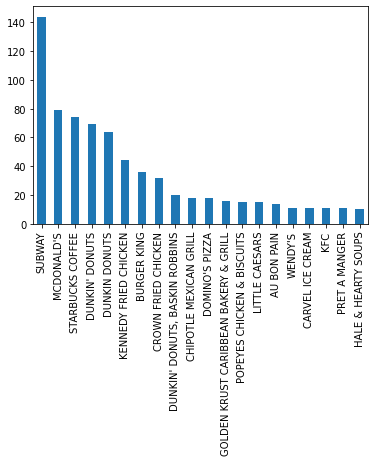

In [44]:
print(vc[vc>1][:20].plot(kind='bar')) #prints out a bar plot of total number for each chain

Q5.

In [45]:
sum1 = sum(vc[vc > 1])
total_restaurants = len(df.drop_duplicates(subset = 'RESTAURANT'))
frac = sum1/total_restaurants
print("Fraction of chain restaurants:", frac) #prints out the fraction of restaurants that are chains

Fraction of chain restaurants: 0.16472216729286138


Q6.

AxesSubplot(0.125,0.125;0.775x0.755)


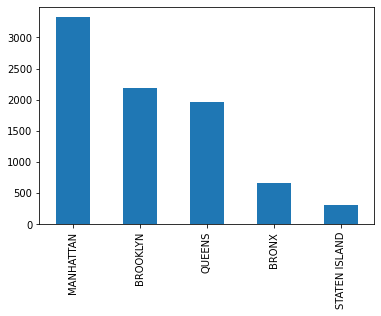

In [46]:
def is_chain(res):
    return vc[res] == 1

df2 = df[['DBA', 'RESTAURANT', 'BORO']].drop_duplicates()
mask = df2['BORO'] == 'Missing'
df2.loc[mask, 'BORO'] = np.nan

mask = df2['DBA'].map(is_chain)
not_chains = df2[mask]
print(not_chains['BORO'].value_counts().plot(kind='bar')) #prints out a plot of non-chain restaurants in each borough

Q7.

AxesSubplot(0.125,0.125;0.775x0.755)


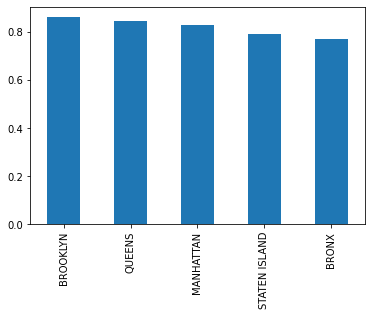

In [47]:
fraction_non_chains = not_chains['BORO'].value_counts()/df2['BORO'].value_counts()
print(fraction_non_chains.sort_values(ascending = False).plot(kind='bar')) #prints out the a plot of fractions of non-chain restaurants in each borough

As shown in the plot above, Manhattan (the borough with the most independent restaurants) does not have the highest ratio.

Q8.

AxesSubplot(0.125,0.125;0.775x0.755)


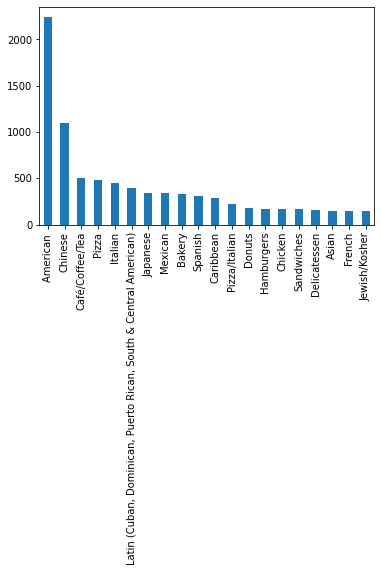

In [48]:
total_cuisine = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates(subset = 'RESTAURANT')['CUISINE DESCRIPTION'].value_counts()
print(total_cuisine[:20].plot(kind='bar')) #prints out a plot of the total number of restaurants for each cuisine type

Q9.

AxesSubplot(0.125,0.125;0.775x0.755)


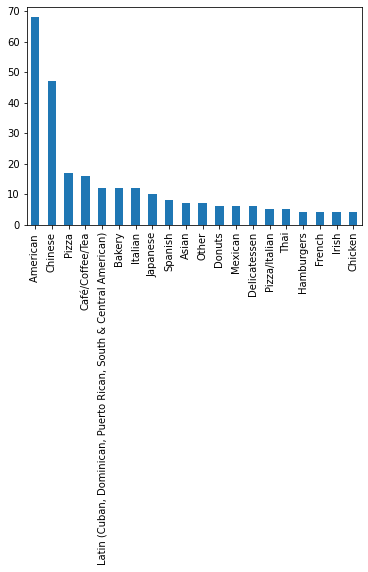

In [54]:
q9 = df[['RESTAURANT','VIOLATION CODE','CUISINE DESCRIPTION']].drop_duplicates(subset = 'RESTAURANT')
mask = q9['VIOLATION CODE'].isnull()
q9plot = q9[mask]['CUISINE DESCRIPTION'].value_counts()
print(q9plot[:20].plot(kind='bar')) #prints out the number of restaurants with no violations for each cuisine type

Q10.

In [55]:
ratio = q9plot/total_cuisine[total_cuisine >= 20]
print(ratio.sort_values(ascending = False)[:10])

Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64


Q11.

In [56]:
mask = df['BORO'] != 'Missing'
new_df = df[mask]
violation = df[mask]['VIOLATION DESCRIPTION']
boro = df[mask]['BORO']

cross_tab = pd.crosstab(new_df['VIOLATION DESCRIPTION'], new_df['BORO'])
print(pd.DataFrame(cross_tab.idxmax())) #prints out the most common Violation Description for each borough

                                                               0
BORO                                                            
BRONX          Non-food contact surface improperly constructe...
BROOKLYN       Non-food contact surface improperly constructe...
MANHATTAN      Non-food contact surface improperly constructe...
QUEENS         Non-food contact surface improperly constructe...
STATEN ISLAND  Non-food contact surface improperly constructe...


Q12.

In [57]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
boro_violation = pd.crosstab(violation, boro)
bronx_f = boro_violation['BRONX']/violationFrequency
man_f = boro_violation['MANHATTAN']/violationFrequency
si_f = boro_violation['STATEN ISLAND']/violationFrequency
queens_f = boro_violation['QUEENS']/violationFrequency
brook_f = boro_violation['BROOKLYN']/violationFrequency

print("Bronx:", bronx_f.idxmax())
print()
print("Manhattan:", man_f.idxmax())
print()
print("Staten Island:", si_f.idxmax())
print()
print("Queens:", queens_f.idxmax())
print()
print("Brooklyn:", brook_f.idxmax())

Bronx: Unprotected food re-served.

Manhattan: Out-of package sale of tobacco products observed.

Staten Island: Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.

Queens: Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.

Brooklyn: Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.


Q13.

In [58]:
def get_area_code(number):
    return number[0:3]

df['AREA CODE'] = df['PHONE'].map(get_area_code)

new_series = df[['ZIPCODE','AREA CODE']].drop_duplicates()['AREA CODE'].value_counts()
print(len(new_series[new_series == 1]))

34


Q14.

In [59]:
def split_street(street):
    street = street.rstrip(' ')
    lst = street.split(' ')
    if lst[-1].isalpha():
        return lst[-1]
    
def split_street_base(street):
    street = street.rstrip(' ')
    lst = street.split(' ')
    if lst[-1].isalpha():
        return ' '.join(lst[0:-1])
    
df['STREET TYPE'] = df['STREET'].map(split_street)
df['STREET BASE'] = df['STREET'].map(split_street_base)
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

mask1 = df['STREET TYPE'] != ' '
mask2 = df['STREET BASE'] != ' '
mask3 = df['STREET BASE & ZIP'] != ' '
df = df[mask1]
df = df[mask2]
df = df[mask3]

table = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates().dropna(how='any')
table

merged = table.merge(table, left_on = 'STREET BASE & ZIP', right_on = 'STREET BASE & ZIP')
mask = merged['STREET TYPE_x'] != merged['STREET TYPE_y']

new_merged = merged[mask]

cross_tab = pd.crosstab(new_merged['STREET TYPE_x'], new_merged['STREET TYPE_y'])
lst = ['AVE','ST','RD','PL','BOULEARD', 'BULEVARD']

for i in lst:
    print("The most common spelling associated with", i, "is", cross_tab[i].idxmax())

The most common spelling associated with AVE is AVENUE
The most common spelling associated with ST is STREET
The most common spelling associated with RD is ROAD
The most common spelling associated with PL is PLACE
The most common spelling associated with BOULEARD is BLVD
The most common spelling associated with BULEVARD is BLVD
